In [66]:
import beauty
import csv
import pandas
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')
%matplotlib inline
beauty.set_tex(False)

In [74]:
group_A = pandas.DataFrame.from_csv('DATA/flattened_A.csv')
group_B = pandas.DataFrame.from_csv('DATA/flattened_B.csv')
group_A['group'] = 'A'
group_B['group'] = 'B'
group_AB = pandas.concat([group_A, group_B])
group_AB.to_csv('DATA/flattened_ALL.csv')

In [50]:
#len(group_A[(group_A.candidate=='Hillary Clinton') & (group_A.favor > 0)])
len(group_AB)

720

# First, some basic measures of favorability and trustworthiness.

## Overall trustworthiness by candidate

In [75]:
score_to_value = {-1:'Unfavorable', 0:'Neutral', 1:'Positive'}
group_AB.favor_score = group_AB.favor.copy()
group_AB.favor = group_AB.favor_score.apply(lambda row:score_to_value[row])

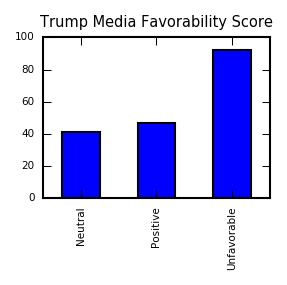

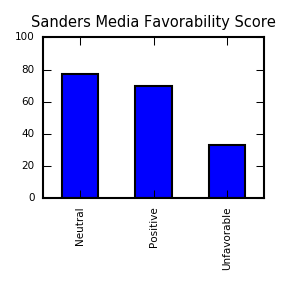

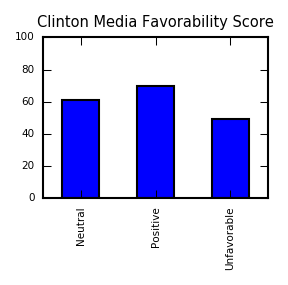

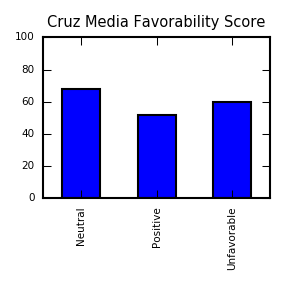

In [106]:
CANDIDATES = set(group_AB.candidate)
 
for c in CANDIDATES:
    group_AB[group_AB.candidate == c]['favor'].value_counts().sort_index().plot(kind='bar')
    plt.tick_params(axis='both', which='major', labelsize=5)
    plt.title(c.split()[-1] + " Media Favorability Score", fontsize=7)
    #plt.xticks([1,2,3],[1,2,3])
    plt.ylim([0,100])
    plt.tight_layout()
    plt.savefig('FIGS/favorability/' + c.split()[-1] + '_favorability.png')
    plt.show()
 


In [52]:
# Get favorability percentage
for c in CANDIDATES:
    print c
    print group_AB[group_AB.candidate==c].favor.value_counts(normalize=True).sort_values() * 100
    print

Donald Trump
 0    22.777778
 1    26.111111
-1    51.111111
Name: favor, dtype: float64

Bernie Sanders
-1    18.333333
 1    38.888889
 0    42.777778
Name: favor, dtype: float64

Hillary Clinton
-1    27.222222
 0    33.888889
 1    38.888889
Name: favor, dtype: float64

Ted Cruz
 1    28.888889
-1    33.333333
 0    37.777778
Name: favor, dtype: float64

